# Linear Regression

y = ax + b

a = ( sum( (x - M(x))(y - M(y)) ) ) / sum( (x - M(x)**2) )

data from : https://www.kaggle.com/venjktry/simple-linear-regression/data

https://www.kaggle.com/andonians/random-linear-regression/downloads/test.csv/2
https://www.kaggle.com/andonians/random-linear-regression/downloads/train.csv/2

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from load_data import fetch_data
import pandas

In [9]:
fetch_data("https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr02.xls","./data","data.xls")

In [10]:
data = pandas.read_excel("./data/data.xls")
data

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998
5,15.500000,75.199997
6,14.700000,69.699997
7,17.100000,82.000000
8,15.400000,69.400002
9,16.200001,83.300003


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
X    15 non-null float64
Y    15 non-null float64
dtypes: float64(2)
memory usage: 320.0 bytes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0918f4dcc0>,
      dtype=object)

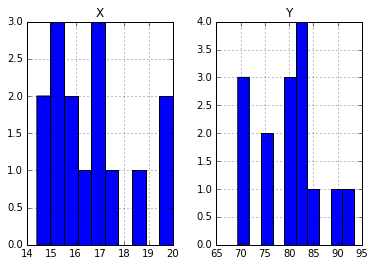

In [28]:
%matplotlib inline 
data.hist()

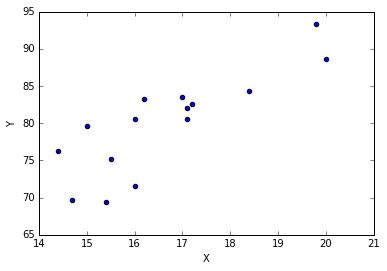

In [30]:
data.plot(kind="scatter", x="X", y="Y")

In [43]:
X = np.array(data["X"])
Y = np.array(data["Y"])

print(X.mean())
print(Y.mean())


16.653333345999997
80.03999989666666


In [57]:
a = np.sum( (X - X.mean())*((Y-Y.mean())) ) / np.sum((X - X.mean())**2)
a

3.2910945679475656

In [60]:
b = Y.mean() - a * X.mean()
b

25.232304983426012

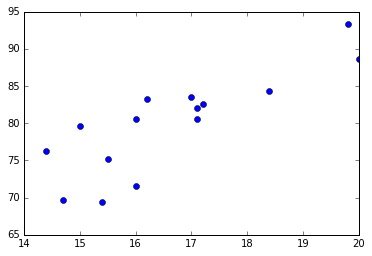

In [80]:
from scipy.stats import linregress
predict =
plt.plot(X,Y,"bo")
